# Estadística para Ciencia de los Datos
# Tarea #2
En esta asignación se busca que los estudiantes exploren un conjunto de datos y determinen qué distribución modela más efectivamente cada columna. En particular, se sugiere que los estudiantes utilicen el conjunto de datos provisto, pero queda abierto a la decisión de los estudiantes usar otros sets de datos.

Deberán tomar en cuenta todas las distribuciones vistas en clase pero no deben limitarse a ellas. Se espera que haya un uso significativo de bibliotecas como `matplotlib` para mostrar visualmente la comparación entre los datos y las distribuciones propuestas.

Los estudiantes deberán entregar a más tardar el día 25 de octubre a las 10:00PM un notebook de colab con la solución a los siguientes ejercicios:

1. Elija alguna variable **cuantitativa** del set de datos y: 
  - Muestre el histograma calculado dinámicamente (e.g. con `matplotlib`) (2 puntos)
  - Brinde al menos una propuesta de distribución candidata que modela esa columna, definiendo los parámetros de la distribución y una gráfica de la distribución paramétrica con `matplotlib` (10 puntos)
  - Proporcione una explicación detallada de qué valores y distribuciones se probaron en el proceso y por qué se hizo la escogencia. (3 puntos)

2. Seleccione 3 columnas adicionales (también cuantitativas) y realize el mismo proceso del punto 2 (45 puntos)
 - Histograma (2 puntos)
 - Parámetros y gráfica (10 puntos)
 - Justificación (3 puntos)
 
3. Para cada columna aplicar una prueba KS  con un $\alpha=0.05$ para determinar si la muestra en efecto sigue la misma distribución que los estudiantes plantean. Si bien es cierto en clase se abordó la prueba KS para pruebas de normalidad, estas también se pueden utilizar para cualquier otro tipo de distribución
 - 4 columnas x 10 puntos cada una (40 puntos)
 - Debe mostrarse suficiente detalle gráfico y aritmético en su respuesta




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasetTarea2.csv')
print('shape', df.shape)
df.head()

shape (200, 11)


,carat,cut,color,clarity,depth,table,price,x,y,z,unknownCol
0,0.32,Premium,J,VS2,61.9,58.0,504,4.38,4.35,2.70,5.1
1,1.50,Good,F,SI2,62.9,59.0,7727,7.19,7.32,4.56,4.9
2,0.38,Ideal,H,VS1,61.7,55.0,955,4.65,4.70,2.89,4.7
3,0.53,Ideal,F,VVS1,62.1,53.2,2273,5.17,5.21,3.22,4.6
4,0.55,Ideal,D,VS2,60.6,56.0,2224,5.30,5.36,3.23,5.0


#  Parte 1: price

Procedimiento manual

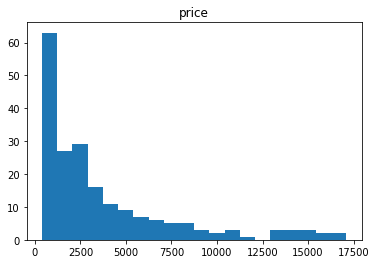

In [2]:
plt.hist(df['price'], bins=20)
plt.title('price')
plt.show()

In [3]:
'''
Opcion 1: Uniforme discreta
Facilmente descartable al ver la forma del histograma, no uniforme.

Opcion 2: Binomial
No es un caso de exito o fracaso, se descarta.

Opcion 3: Geometrica
Se descarta por su definicion: "la variable aleatoria  𝑋  es el número de pruebas para que ocurra el 
primer éxito, es decir, 𝑝(𝑥) cuantifica la probabilidad de que se deban realizar exactamente  𝑥  
pruebas para encontrar la primera ocurrencia del evento."

Opcion 4: Poisson  
Poisson trata de medir cuantas ocurrencias de un evento se dan por segmento.

𝜇=E(𝑋)=𝜆 
𝜎2=Var(𝑋)=𝜆
'''

'\nOpcion 1: Uniforme discreta\nFacilmente descartable al ver la forma del histograma, no uniforme.\n\nOpcion 2: Binomial\nNo es un caso de exito o fracaso, se descarta.\n\nOpcion 3: Geometrica\nSe descarta por su definicion: "la variable aleatoria  𝑋  es el número de pruebas para que ocurra el \nprimer éxito, es decir, 𝑝(𝑥) cuantifica la probabilidad de que se deban realizar exactamente  𝑥  \npruebas para encontrar la primera ocurrencia del evento."\n\nOpcion 4: Poisson  \nPoisson trata de medir cuantas ocurrencias de un evento se dan por segmento.\n\n𝜇=E(𝑋)=𝜆 \n𝜎2=Var(𝑋)=𝜆\n'

media = lamba = 3751.065
varianza = lamba = 15091369.005804019


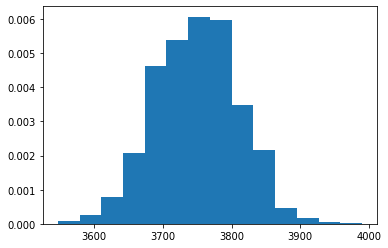

'\nComo lamda es igual a la media y a la varianza, un numero grande de media, como 3751 implica varianza grande.\nSe descarta Poisson, la varianza no es igual a la media.\n'

In [4]:
from scipy.stats import poisson
import numpy as np 
import matplotlib.pyplot as plt

u = df['price'].mean()
var = df['price'].var()
print('media = lamba =', u)
print('varianza = lamba =', var)
s = np.random.poisson(u, 1000)
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

'''
Como lamda es igual a la media y a la varianza, un numero grande de media, como 3751 implica varianza grande.
Se descarta Poisson, la varianza no es igual a la media.
'''


In [5]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
'''
Opcion 5: Gamma
"Casi toda el área bajo la función de densidad está ubicada cerca del origen y 
la función de densidad cae gradualmente conforme y aumenta."

La definicion parece calzar con el comportamiento del los datos viendo el histograma.

𝛼 es un parámetro de forma y 𝛽 es un parámetro de escala.

𝜇=E(𝑋)=𝛼𝛽 
𝜎2=Var(𝑋)=𝛼𝛽^2

'''
u = df['price'].mean()
var = df['price'].var()
print('[1] media = a * b =', u)
print('[2] varianza = a * b^2 =', var)

print('de [1] => b = u/a')
print('de [2] => var = a * u^2/a^2')
a = u**2/var
b = u/a
scale = 1/b
print('=> a = u^2/var = ', a)
print('=> b = u/a = ', b)

data = df['price']
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(data, loc=20)
print(fit_alpha, fit_beta, fit_loc)



[1] media = a * b = 3751.065
[2] varianza = a * b^2 = 15091369.005804019
de [1] => b = u/a
de [2] => var = a * u^2/a^2
=> a = u^2/var =  0.9323533622969263
=> b = u/a =  4023.222473032064
0.6829571458200794 5200.331492176265 393.9999999999999


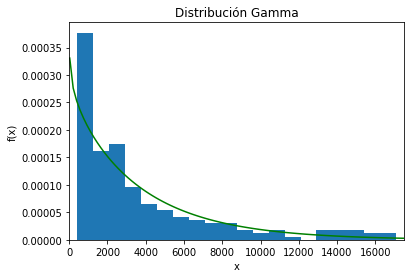

In [6]:
# Graficando Gamma
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


#distribución gammal con alpha=a y beta=b
gamma2 = stats.gamma(a,scale=b)
x2= np.linspace(gamma2.ppf(0.01),
                gamma2.ppf(0.99), 100)
fp2 = gamma2.pdf(x2) # Función de Probabilidad
plt.plot(x2, fp2, color="green", label="alpha=2")
plt.hist(df['price'], bins=20, density=True)

plt.xlim(0, 17500) #0,10
plt.rcParams["figure.autolayout"] = True

plt.title('Distribución Gamma')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

Como para dist. exponencial => a = 1
[1] media = b = 3751.065


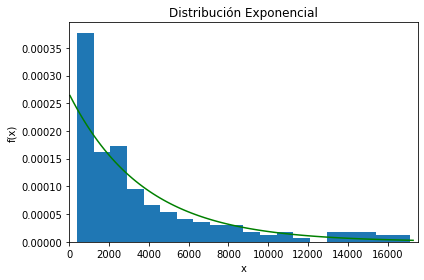

In [7]:
'''
Opcion 6: Exponencial
'''
u = df['price'].mean()
var = df['price'].var()
a = 1
print('Como para dist. exponencial => a = 1')
print('[1] media = b =', u)
b = u

gamma2 = stats.gamma(a,scale=b)
x2= np.linspace(gamma2.ppf(0.01),
                gamma2.ppf(0.99), 100)
fp2 = gamma2.pdf(x2) # Función de Probabilidad
plt.plot(x2, fp2, color="green", label="alpha=2")
plt.hist(df['price'], bins=20, density=True)

plt.xlim(0, 17500) #0,10
plt.rcParams["figure.autolayout"] = True

plt.title('Distribución Exponencial')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

Para la columna Price, se selecciona la dist Gamma porque representa mejor comportamiento de los datos bajos (<2000).

# Parte 2

Para la parte 2 estoy usando como referencia la página: https://www.cienciadedatos.net/documentos/pystats01-ajuste-distribuciones-python.html

Primero voy a volver a trabajar con la columna **price** utilizando el metodo *fit* para dist normal y gamma, para comparar con los valores calculados en la primera parte.

In [8]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style

# Ajuste de distribuciones
# ==============================================================================
from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF

# Configuración matplotlib
# ==============================================================================
#plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


'''
    Dibuja un hist y dist con parametros
    
    Recibe como entrada la columna del set de datos
    y la distribucion a dibujar y
    un tuple con los parametros
'''
def plot_dist(col, dist, parametros, ylim=1, bins=30):
    x = df[col]
    
    # Se crea un diccionario que incluya el nombre de cada parámetro
    nombre_parametros = [p for p in inspect.signature(dist._pdf).parameters \
                         if not p=='x'] + ["loc","scale"]
    parametros_dict = dict(zip(nombre_parametros, parametros))
    print(parametros_dict)    
    
    x_hat = np.linspace(min(x), max(x), num=100)
    y_hat = dist.pdf(x_hat, *parametros)
           
    fig, ax = plt.subplots(figsize=(7,4))
        
    ax.plot(x_hat, y_hat, linewidth=2, label=dist.name)
    ax.hist(x=x, density=True, bins=bins, color="#3182bd", alpha=0.5);
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title('Ajuste distribución')
    ax.set_xlabel(col)
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend();
    ax.set_ylim([0, ylim])
      
    return ax    


'''
    Recibe como entrada la columna del set de datos
    y la distribucion con la cual se trata de ajustar
    los datos
'''
def ajuste_dist(col, dist, ylim=1, bins=30):
    x = df[col]
    #print(x.describe())
    
    # Con el método fit() se obtienen los parámetros
    parametros = dist.fit(data=x)

    ax = plot_dist(col, dist, parametros, ylim, bins)
    return ax    





{'loc': 3751.065, 'scale': 3875.0370528260755}


<AxesSubplot:title={'center':'Ajuste distribución'}, xlabel='price', ylabel='Densidad de probabilidad'>

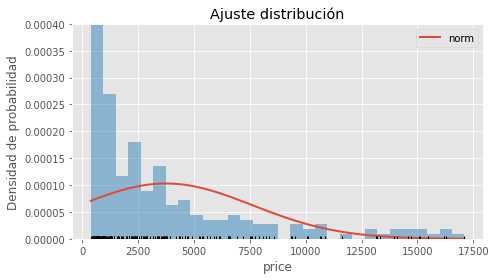

In [9]:
ajuste_dist('price', stats.norm, 0.0004)

{'a': 0.7331252955913232, 'loc': 393.99999999999994, 'scale': 4736.513777739205}


<AxesSubplot:title={'center':'Ajuste distribución'}, xlabel='price', ylabel='Densidad de probabilidad'>

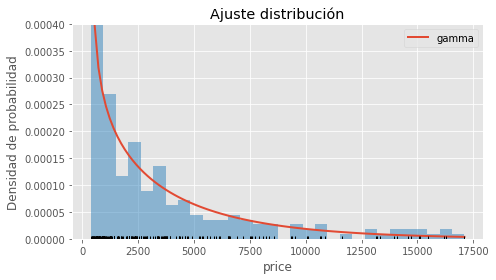

In [10]:
ajuste_dist('price', stats.gamma, 0.0004)

Se puede apreciar que los valores obtenidos por gamma.fit parecen ajustarse mejor, que utilizando los valores calculados en la parte 1 a partir de los valores de la muestra.

## Table

{'loc': 57.298500000000004, 'scale': 2.2752687203932638}


<AxesSubplot:title={'center':'Ajuste distribución'}, xlabel='table', ylabel='Densidad de probabilidad'>

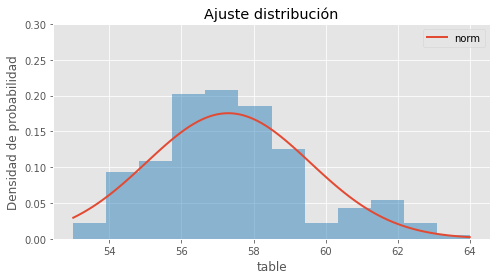

In [11]:
# Primero dibujando un histograma y aprox con dist normal
ajuste_dist('table', stats.norm, 0.3, 12)

{'loc': 57.2985, 'scale': 2.0}


<AxesSubplot:title={'center':'Ajuste distribución'}, xlabel='table', ylabel='Densidad de probabilidad'>

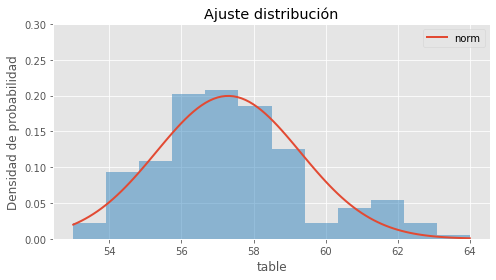

In [12]:
# Al parecer cumple con la forma, pero en este caso voy a ajustar manualmente el parametro std
# para ver el efecto
params = (57.2985, 2.0)
plot_dist('table', stats.norm, params, 0.3, 12)

{'df': 19834.207478941207, 'loc': 57.298433213677335, 'scale': 2.2751482653329616}


<AxesSubplot:title={'center':'Ajuste distribución'}, xlabel='table', ylabel='Densidad de probabilidad'>

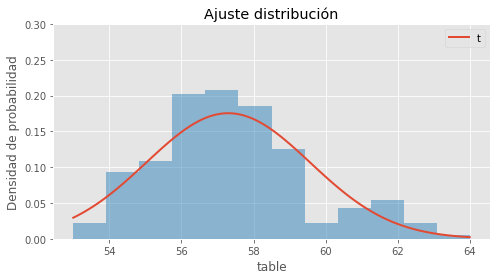

In [13]:
ajuste_dist('table', stats.t, 0.3, 12)

La dist t se comporta de manera similar, escogemos normal en este caso.

## Depth

{'loc': 61.78799999999999, 'scale': 1.4213922752006214}


<AxesSubplot:title={'center':'Ajuste distribución'}, xlabel='depth', ylabel='Densidad de probabilidad'>

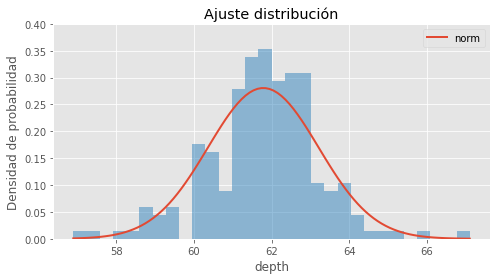

In [14]:
# Primero dibujando un histograma y aprox con dist normal
ajuste_dist('depth', stats.norm, 0.4, 30)

Para la columna **depth** los datos al parecer siguen una dist normal, con media=61.78, std=1.42

## Z

{'loc': 3.5249, 'scale': 0.6914173775658231}


<AxesSubplot:title={'center':'Ajuste distribución'}, xlabel='z', ylabel='Densidad de probabilidad'>

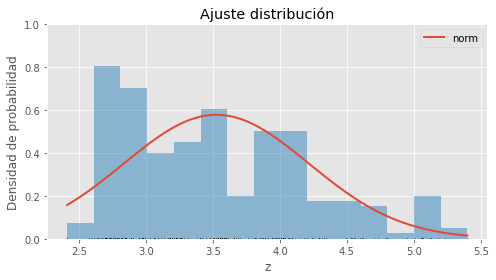

In [15]:
# Primero dibujando un histograma y aprox con dist normal
ajuste_dist('z', stats.norm, 1, 15)

Ajustando con <scipy.stats._continuous_distns.alpha_gen object at 0x7fc26d8b8760>
{'a': 5.14759456224573, 'loc': 0.17089233766548387, 'scale': 16.587903931972548}
Ajustando con <scipy.stats._continuous_distns.anglit_gen object at 0x7fc26d8b8af0>
{'loc': 3.731226657583278, 'scale': 2.15913109248265}
Ajustando con <scipy.stats._continuous_distns.arcsine_gen object at 0x7fc26d8b8d30>
{'loc': 2.408207919121136, 'scale': 2.9917920808788647}
Ajustando con <scipy.stats._continuous_distns.argus_gen object at 0x7fc26d7f4310>
{'chi': 2.590248282098239e-05, 'loc': 1.6814660273548654, 'scale': 3.725588273420323}
Ajustando con <scipy.stats._discrete_distns.bernoulli_gen object at 0x7fc26d81adc0>
No fit for <scipy.stats._discrete_distns.bernoulli_gen object at 0x7fc26d81adc0>
Ajustando con <scipy.stats._continuous_distns.beta_gen object at 0x7fc26d8b89a0>
{'a': 1.6617044742165494, 'b': 3.807814600386661, 'loc': 2.3979316061962272, 'scale': 3.7274437149408413}
Ajustando con <scipy.stats._discrete_dis

{'a': 8.58576689086976, 'loc': 1.5552791989069843, 'scale': 15.001325259181833}
Ajustando con <scipy.stats._continuous_distns.invgauss_gen object at 0x7fc26d876640>
{'mu': 0.27058062901214475, 'loc': 2.068628391356489, 'scale': 5.382018525645322}
Ajustando con <scipy.stats._continuous_distns.invweibull_gen object at 0x7fc26d8768e0>
{'c': 19.959652691399114, 'loc': -7.465283818762485, 'scale': 10.652705376918068}
Ajustando con <scipy.stats._continuous_distns.johnsonsb_gen object at 0x7fc26d8130d0>
{'a': 0.7899520191512602, 'b': 0.9537678363236056, 'loc': 2.3682218637241927, 'scale': 3.440506120896682}
Ajustando con <scipy.stats._continuous_distns.johnsonsu_gen object at 0x7fc26d813370>
{'a': -8.230542903334555, 'b': 1.9782457383338308, 'loc': 2.0964448166154463, 'scale': 0.03942318960208338}
Ajustando con <scipy.stats._continuous_distns.kappa3_gen object at 0x7fc26d82e9a0>
{'a': 6.668825573404728, 'loc': 2.4099999999799175, 'scale': 1.560622005390714}
Ajustando con <scipy.stats._continu

{'c': 1.0, 'd': 1.0, 'loc': 2.111, 'scale': 3.588}
Ajustando con <scipy.stats._continuous_distns.triang_gen object at 0x7fc26d7da3d0>
{'c': 0.10544103947913447, 'loc': 2.3916039532279982, 'scale': 3.1145006433865707}
Ajustando con <scipy.stats._continuous_distns.truncexpon_gen object at 0x7fc26d7da6d0>
{'b': 1.0754272733141041, 'loc': 2.409999977640399, 'scale': 2.780293700536154}
Ajustando con <scipy.stats._continuous_distns.truncnorm_gen object at 0x7fc26d7daa60>
{'a': 0.9015482215897133, 'b': 1.6009849280375819, 'loc': 0.0021890907748951093, 'scale': 7.134297062689321e-31}
Ajustando con <scipy.stats._continuous_distns.tukeylambda_gen object at 0x7fc26d7dad60>
{'lam': 0.2880177008557351, 'loc': 3.6084751011319405, 'scale': 0.5851435902415437}
Ajustando con <scipy.stats._continuous_distns.uniform_gen object at 0x7fc26d7da940>
{'loc': 2.41, 'scale': 2.99}
Ajustando con <scipy.stats._continuous_distns.vonmises_gen object at 0x7fc26d7da460>
{'kappa': 1.2712449479387076, 'loc': 3.21942842

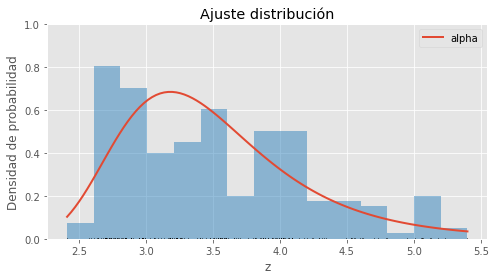

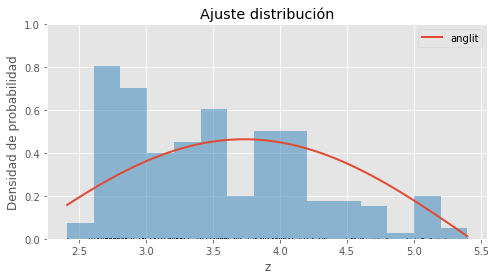

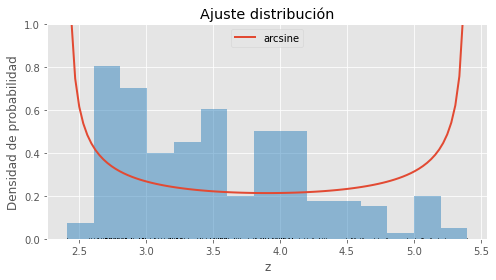

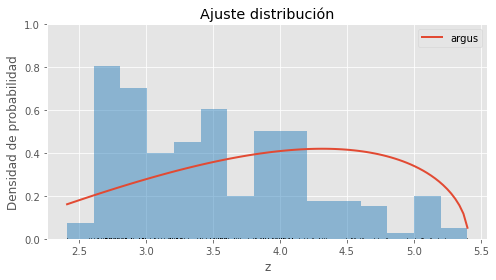

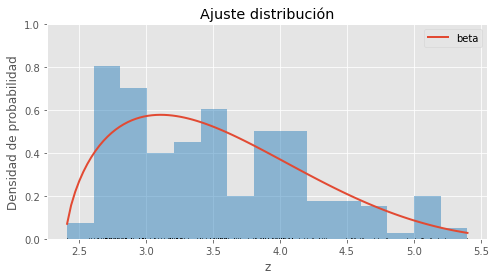

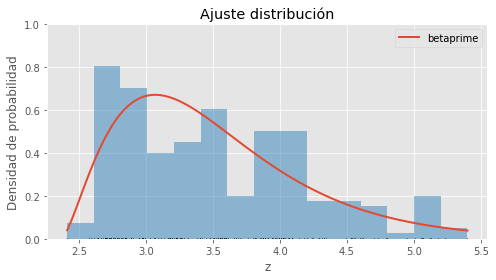

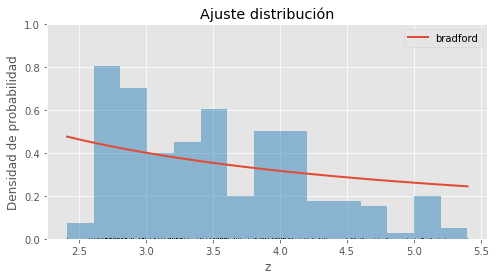

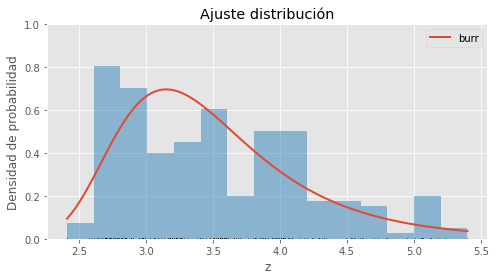

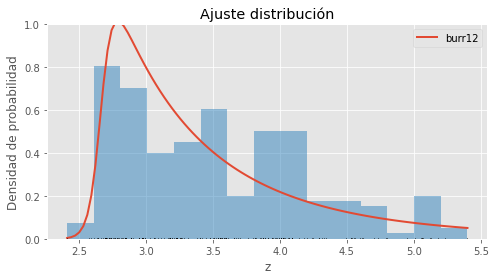

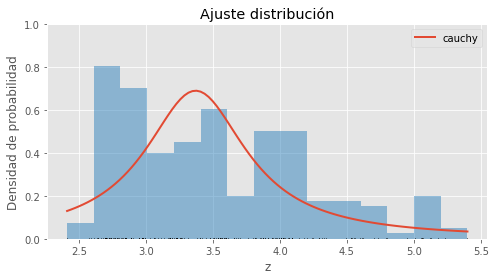

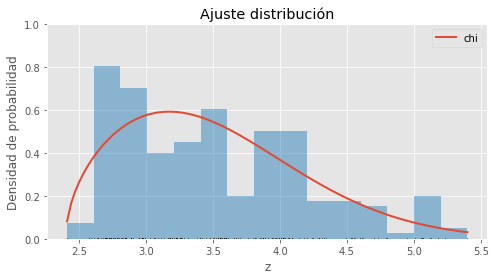

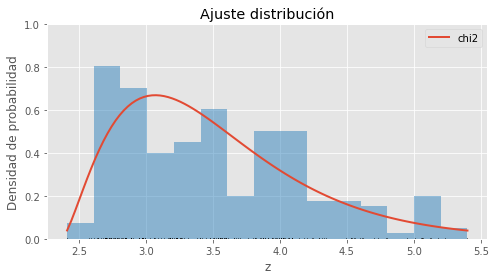

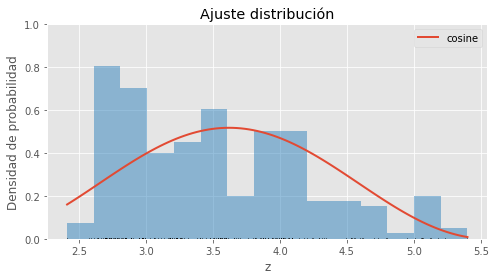

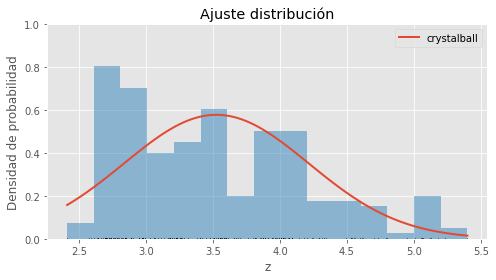

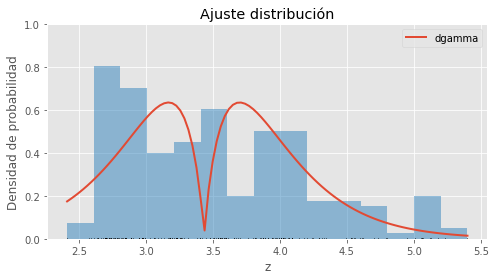

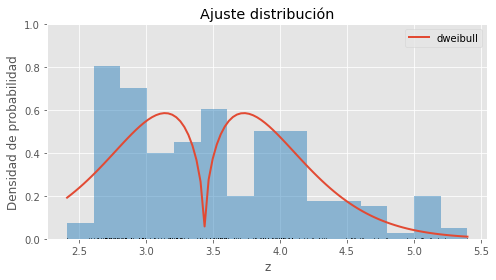

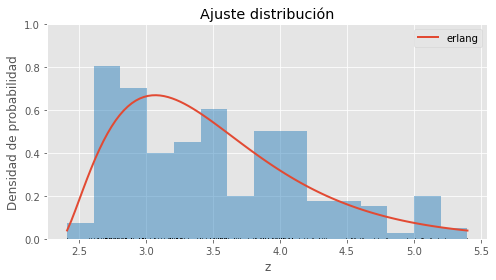

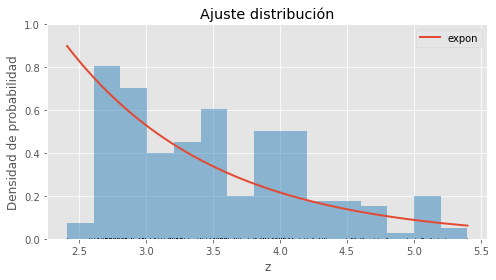

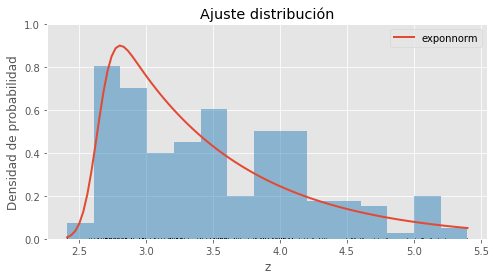

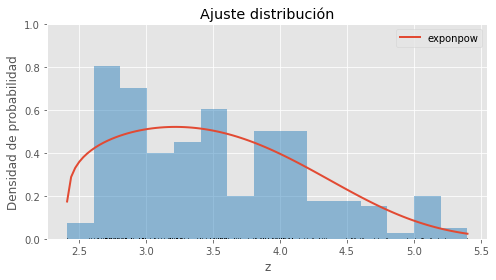

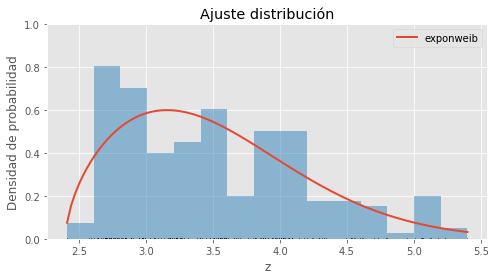

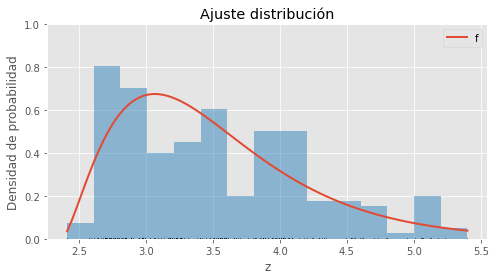

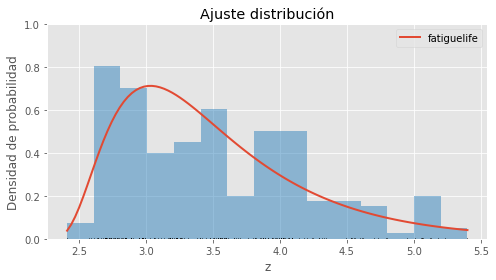

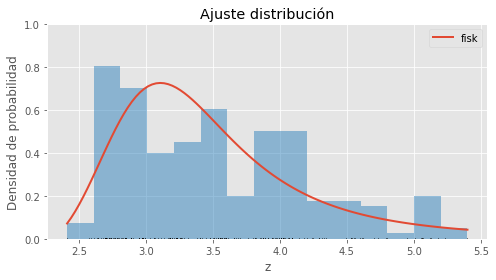

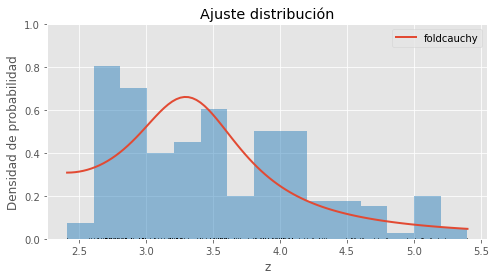

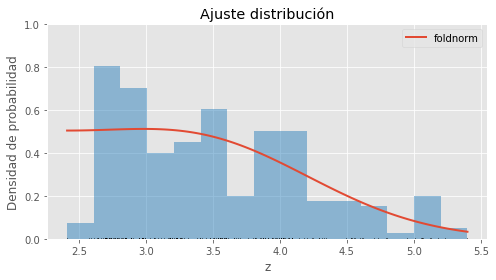

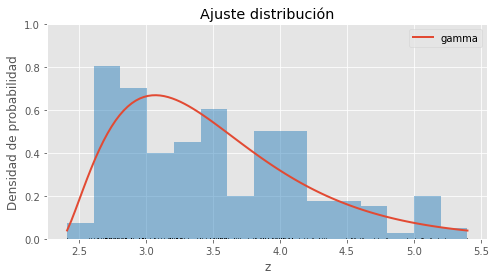

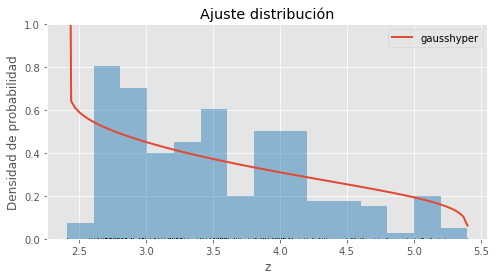

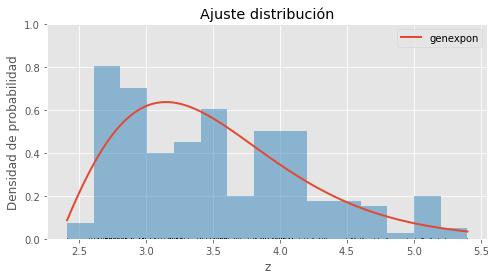

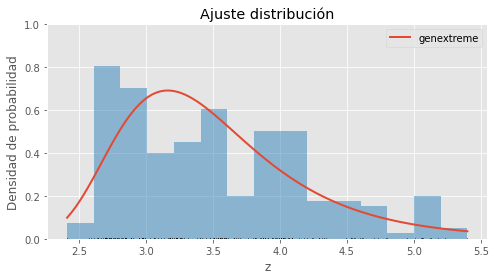

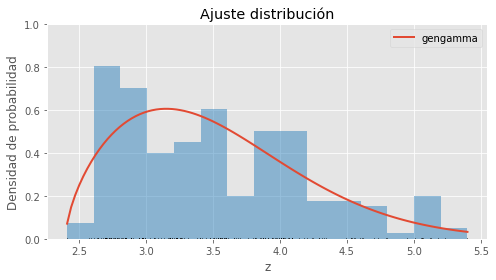

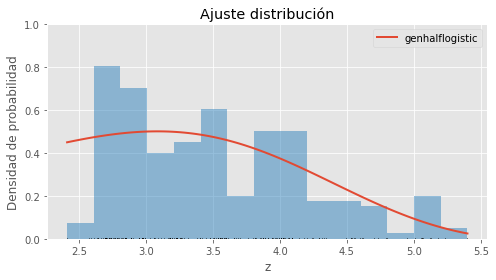

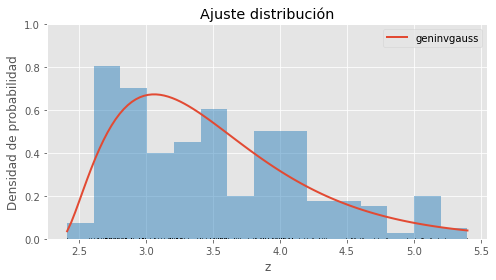

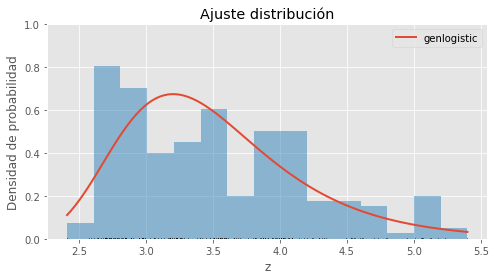

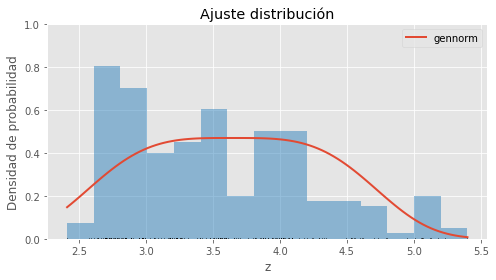

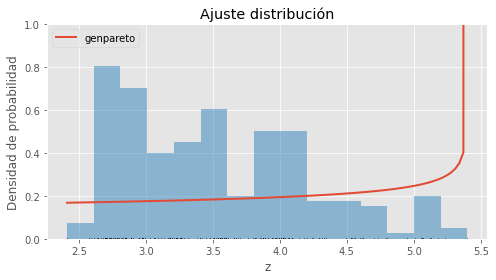

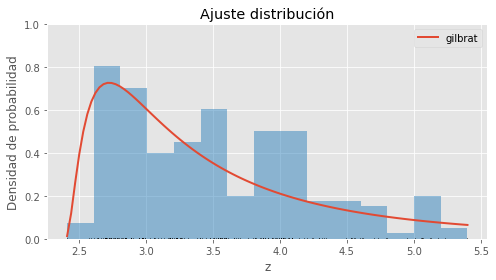

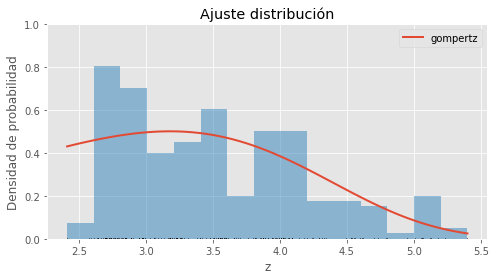

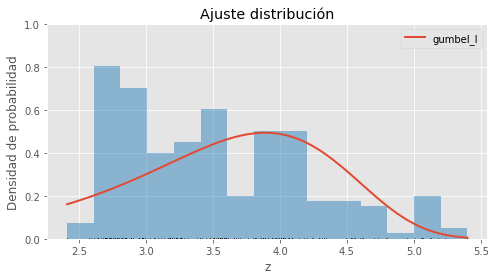

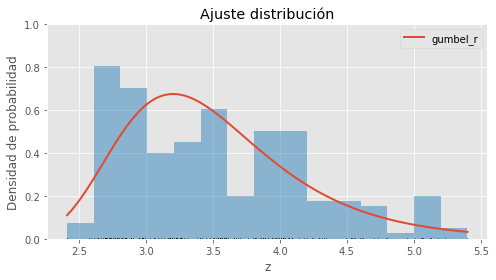

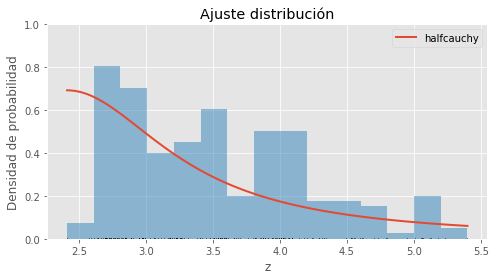

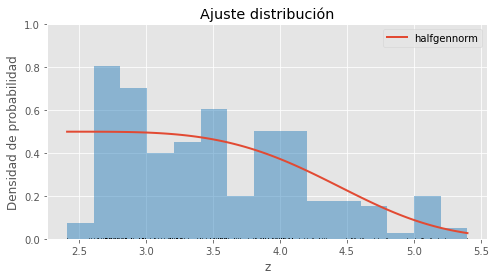

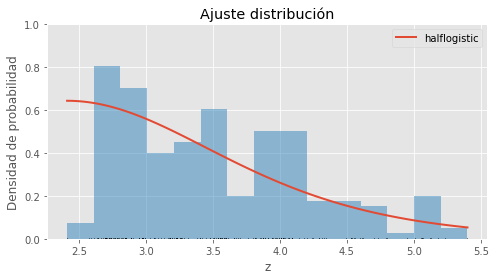

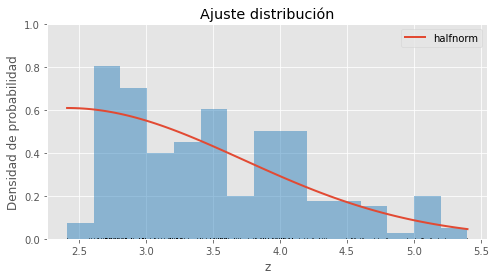

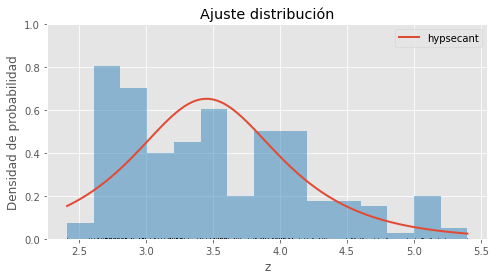

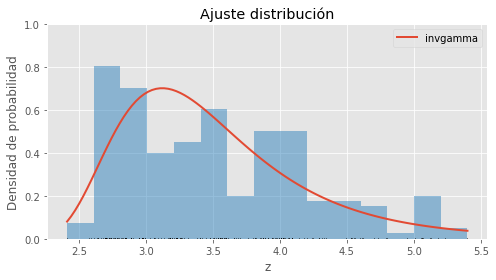

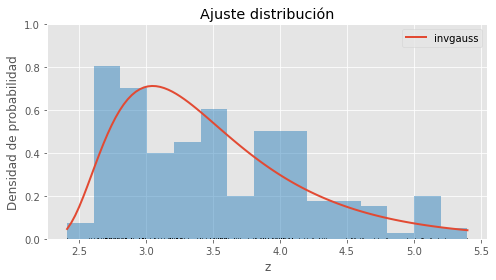

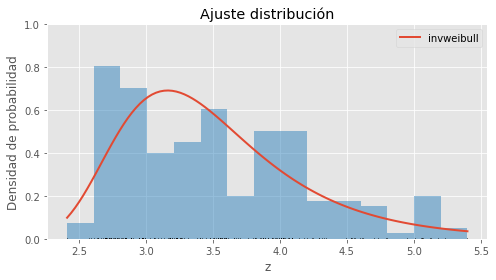

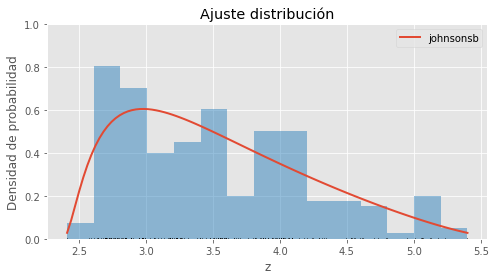

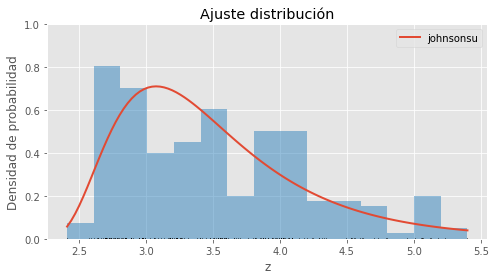

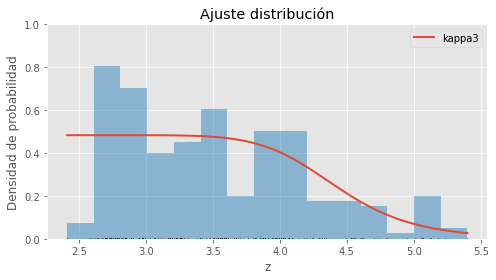

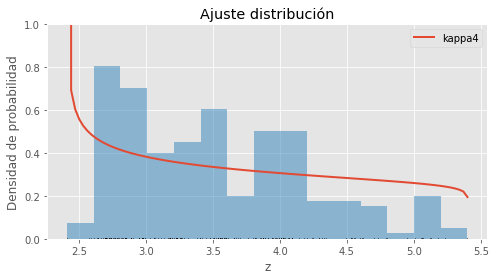

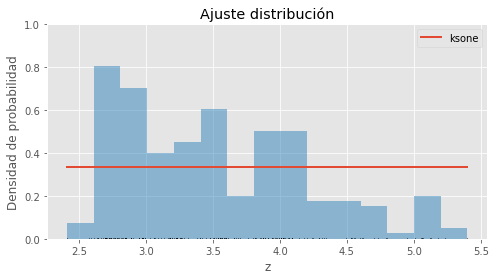

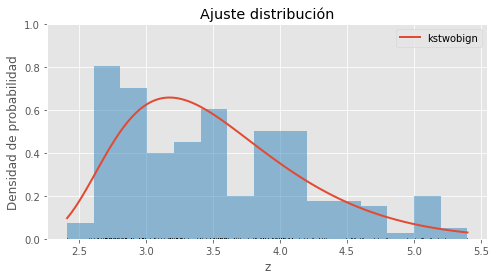

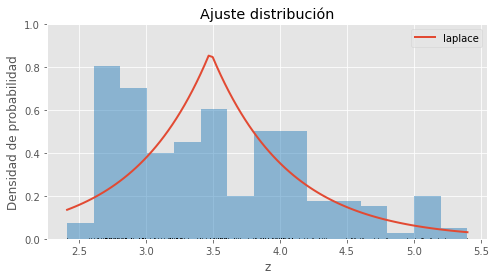

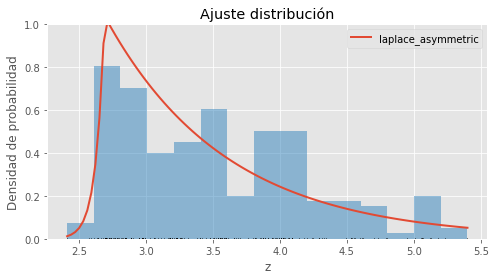

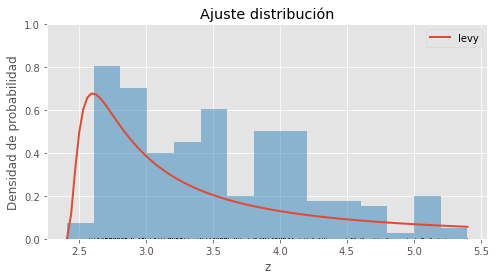

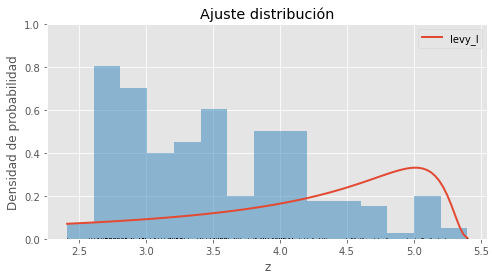

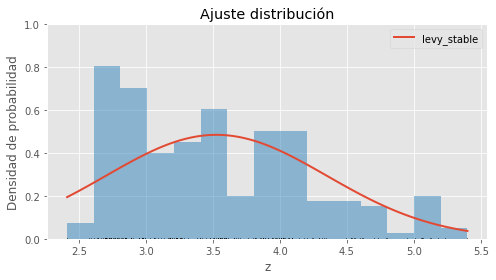

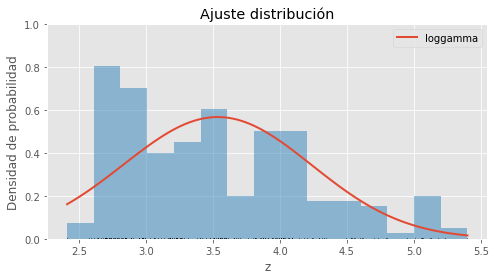

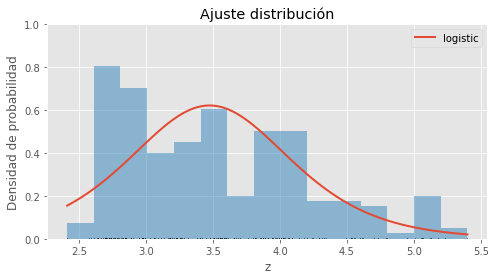

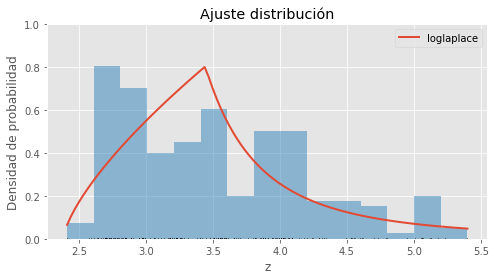

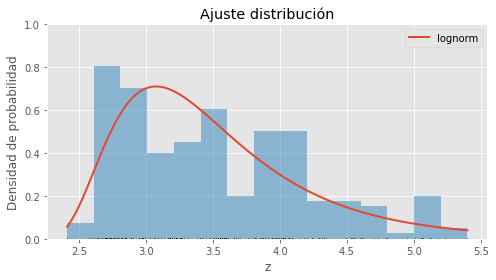

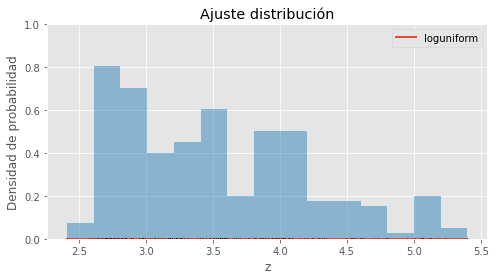

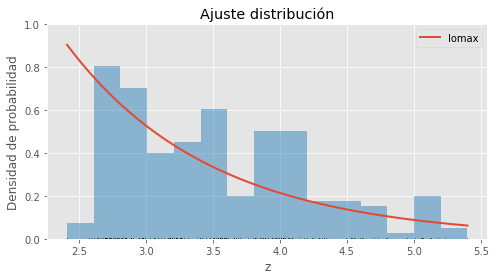

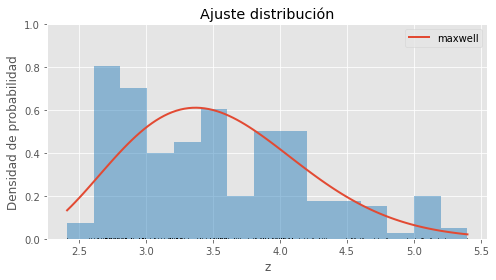

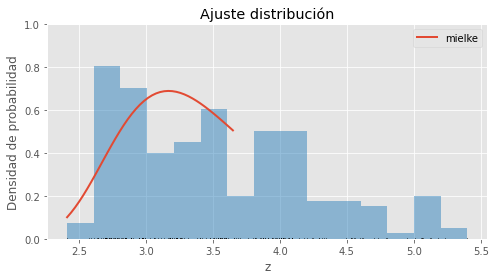

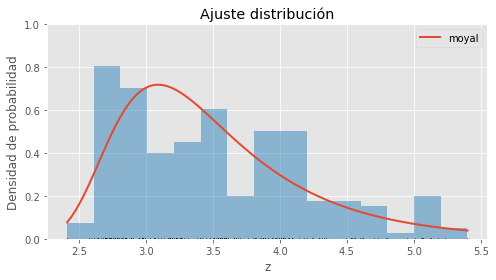

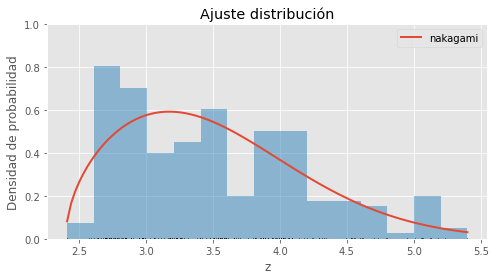

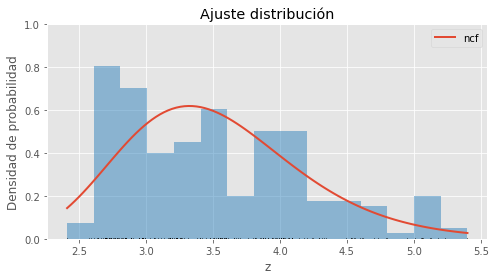

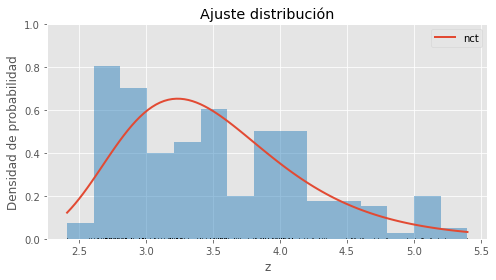

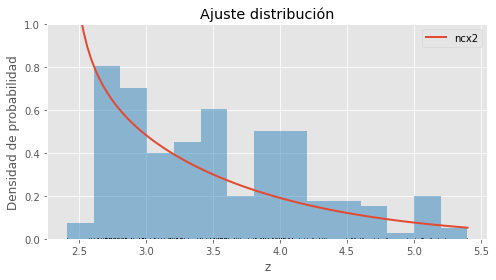

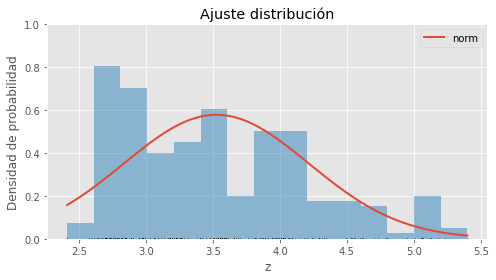

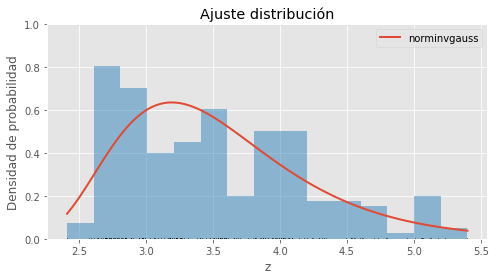

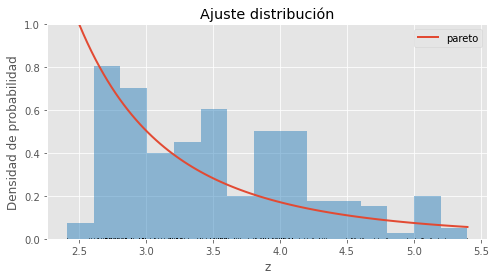

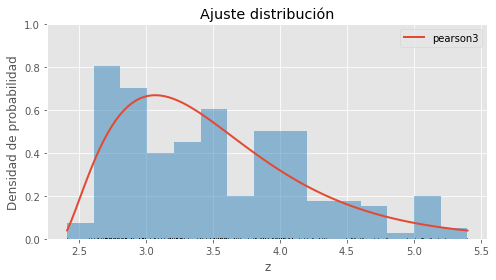

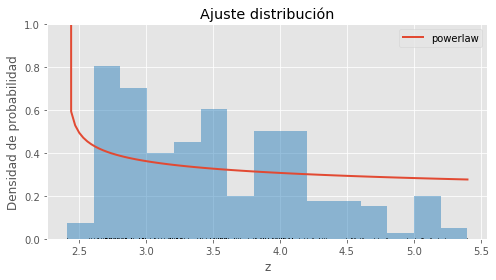

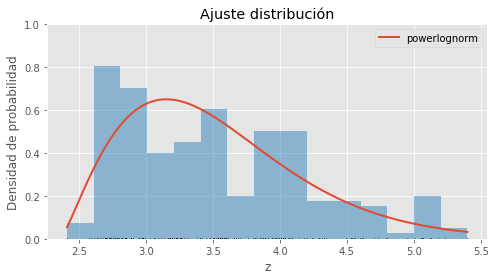

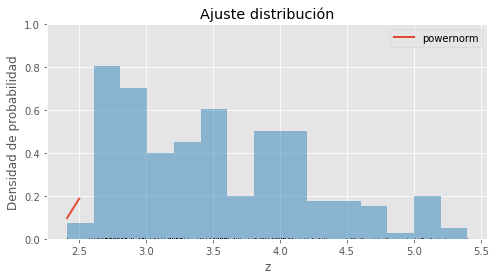

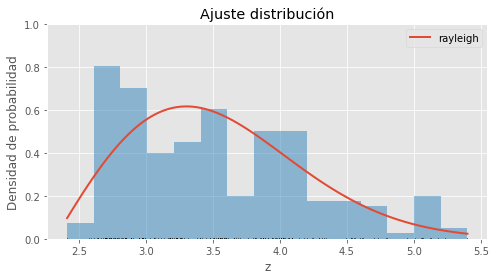

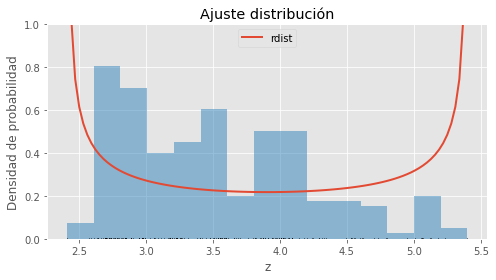

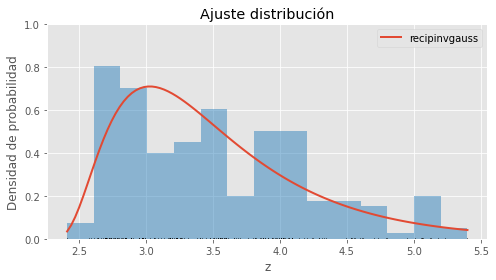

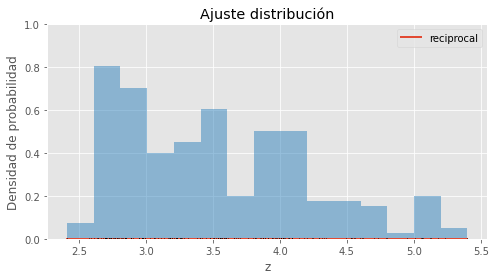

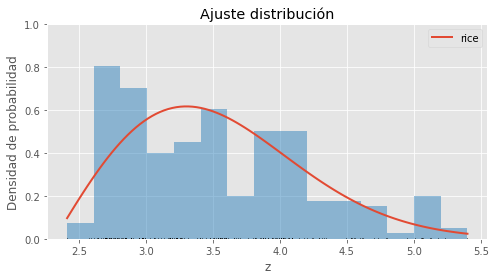

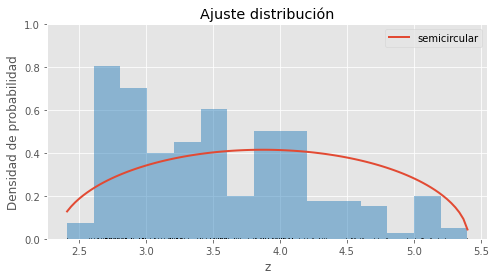

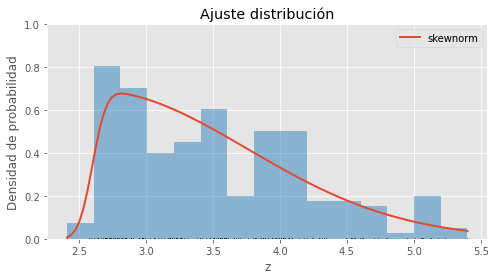

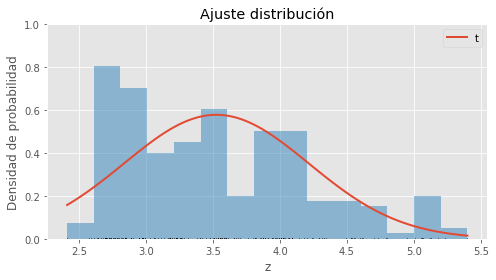

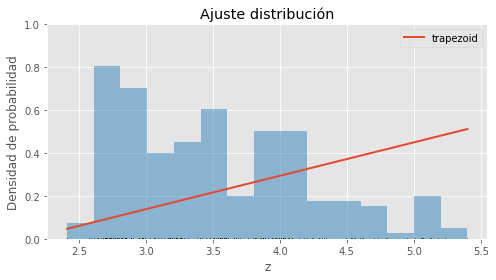

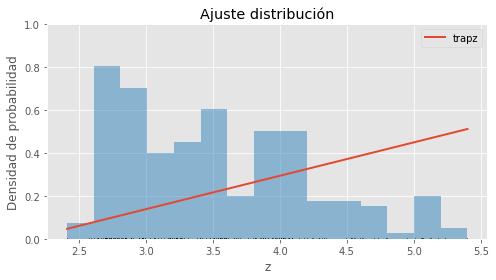

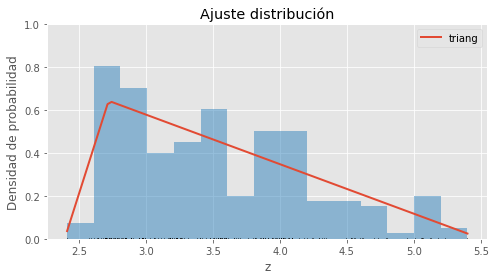

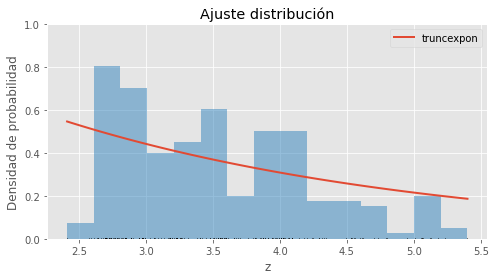

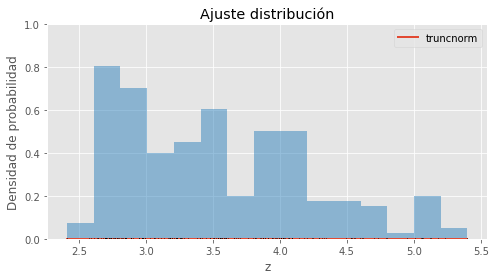

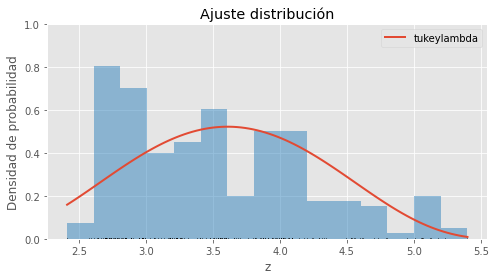

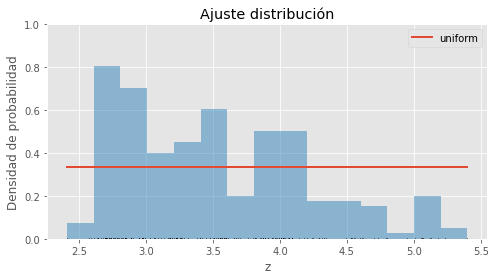

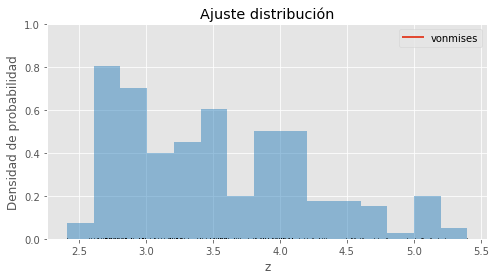

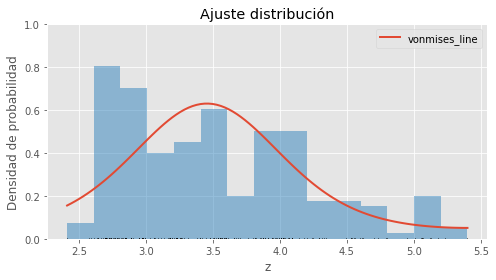

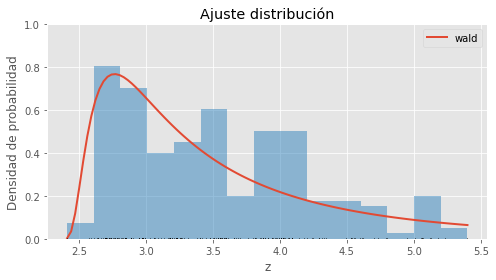

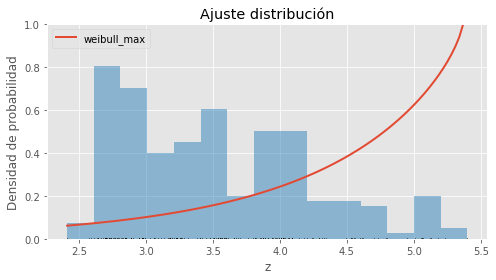

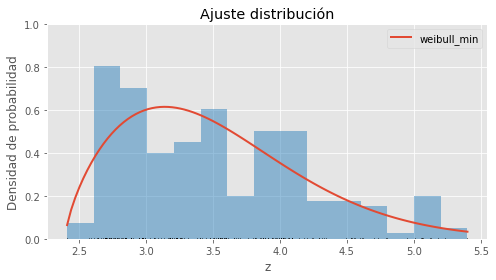

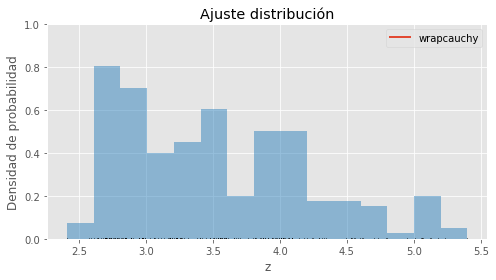

In [16]:
# Debido a la forma poco uniforme de la dist, voy a tratar de ajustar utilizando 
# todas las posibles dist de la libreria stats, para ver cual se ajusta mejor.

# Codigo para probar todas las dist
distribuciones = [getattr(stats,d) for d in dir(stats) \
                  if isinstance(getattr(stats,d), (stats.rv_continuous, stats.rv_discrete))]
for dist in distribuciones:
    print('Ajustando con', dist)
    try:
        ajuste_dist('z', dist, 1, 15)
    except:
        print('No fit for', dist)

{'df': 5.072547071771579, 'loc': 2.3668832019201735, 'scale': 0.22829065326560585}


<AxesSubplot:title={'center':'Ajuste distribución'}, xlabel='z', ylabel='Densidad de probabilidad'>

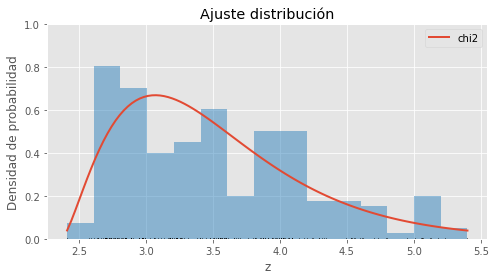

In [17]:
# Se selecciona skewnorm porque visualmente pareciera el mejor ajuste, aunque se puede apreciar 
# que no es optimo.
ajuste_dist('z', stats.chi2, 1, 15)

# Parte 3: pruebas KS

In [18]:
import torch
from torch.distributions import Normal
from torch.distributions import Gamma
from torch.distributions import Chi2

from scipy.stats import ksone


def v_critico(alpha, n):
    p = 1-alpha/2
    return ksone.ppf(p, n)


def k_check(n, conf, cdfEmpirical, cdfIdeal, histogramX):
    
    #Compare the empirical and ideal distributions
    difference = torch.abs(cdfIdeal - cdfEmpirical)
    dn = torch.max(difference)
    
    vc = v_critico(1-conf, n)
    print('ValorCritico:', vc)
    print('n:', n)
    print('cdfIdeal:', cdfIdeal)
    print('cdfEmpirical:', cdfEmpirical)
    print('Distancia KS:', dn)
    
    desc = ''' ------------------------------------------------------------
    El valor D obtenido es probado con una confianza de  1−a=%.2f, 
    entonces utilizando la tabla de la distribución Kolgomorov (tabla KS), 
    podemos verificar que D>D(n,a) que, para este caso, vemos que %.4f>%.4f
    
    Si D es mayor que el valor crítico, la hipótesis nula H0 se rechaza, 
    de lo contrario se acepta (se supone como cierta).
    ''' %(conf, dn, vc)
    print(desc)
    
    if dn>vc:
        hipo = '''
    Esto quiere decir que la hipótesis nula H0 que plantea que el histograma h ha sido generado 
    de una distribución nomal, se rechaza. '''
    else:
        hipo = '''
    Como el valor D es menor se asume como cierta H0 o en otras palabras, no se tendría la suficiente 
    evidencia como para demostrar lo contrario. '''
    print(hipo)
        

    torch.Tensor.ndim = property(lambda self: len(self.shape))  # Fix it
    plt.plot(histogramX, cdfEmpirical, label='cdfEmpirical')
    plt.plot(histogramX, cdfIdeal, label='cdfIdeal')
    plt.legend(loc="upper left")
    plt.show()        



def ks_norm(col, conf=0.95, mean=0, std=0):
    x = torch.tensor(df[col].values)
    histogramX, histogram = x.unique(return_counts=True)
    print('Ocurrences:', histogram)
    print('Values:', histogramX)

    #number of observations
    n = histogram.sum()
    histogramNorm = histogram / n        # Norm factor for mean
    histogramNorm2 = histogram / (n - 1) # Norm factor for std

    #calculate cumulative sum
    cdfEmpirical = torch.cumsum(histogramNorm, dim = 0)

    #get sample stats
    meanHist = mean
    stdHist = std
    
    if not meanHist:
        meanHist = (histogramX * histogramNorm).sum()
    if not std:
        stdHist = torch.sqrt((histogramNorm2 * (histogramX - meanHist) ** 2).sum())
    print('mean:', meanHist)
    print('std:', stdHist)

    #Create ideal CDF
    normalDensity = Normal(meanHist, stdHist)
    cdfNormalIdeal = normalDensity.cdf(histogramX) #points used to evaluate cdf
    
    k_check(n, conf, cdfEmpirical, cdfNormalIdeal, histogramX)

    



## Table (normal)

Ocurrences: tensor([ 3,  1, 17, 20, 37, 38, 34, 23,  1,  3,  1,  7, 10,  1,  3,  1])
Values: tensor([53.0000, 53.2000, 54.0000, 55.0000, 56.0000, 57.0000, 58.0000, 59.0000,
        59.5000, 60.0000, 60.5000, 61.0000, 62.0000, 62.5000, 63.0000, 64.0000],
       dtype=torch.float64)
mean: 57.2985
std: 2.2752687
ValorCritico: 0.09515799837695846
n: tensor(200)
cdfIdeal: tensor([0.0294, 0.0358, 0.0736, 0.1562, 0.2841, 0.4478, 0.6211, 0.7727, 0.8334,
        0.8825, 0.9203, 0.9481, 0.9806, 0.9889, 0.9939, 0.9984],
       dtype=torch.float64)
cdfEmpirical: tensor([0.0150, 0.0200, 0.1050, 0.2050, 0.3900, 0.5800, 0.7500, 0.8650, 0.8700,
        0.8850, 0.8900, 0.9250, 0.9750, 0.9800, 0.9950, 1.0000])
Distancia KS: tensor(0.1322, dtype=torch.float64)
 ------------------------------------------------------------
    El valor D obtenido es probado con una confianza de  1−a=0.95, 
    entonces utilizando la tabla de la distribución Kolgomorov (tabla KS), 
    podemos verificar que D>D(n,a) que, pa

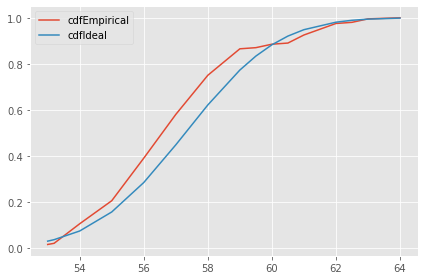

In [19]:
# Columna Table => dist normal, params = (m=57.2985, s=2.2752687)
ks_norm('table', 0.95, 57.2985, 2.2752687)

## Depth (normal)

Ocurrences: tensor([ 1,  1,  1,  1,  1,  1,  2,  1,  2,  1,  2,  1,  3,  8,  1,  4,  1,  3,
         3,  1,  1,  4,  7,  5,  3,  4,  8,  5, 10,  4, 12,  8,  4,  6,  5,  5,
         8,  6,  7,  4,  6,  6,  5,  3,  4,  3,  2,  1,  3,  2,  1,  1,  3,  1,
         1,  1,  1,  1])
Values: tensor([56.9000, 57.3000, 58.2000, 58.5000, 58.7000, 58.8000, 58.9000, 59.1000,
        59.2000, 59.3000, 59.5000, 59.6000, 60.0000, 60.1000, 60.2000, 60.3000,
        60.4000, 60.5000, 60.6000, 60.7000, 60.8000, 60.9000, 61.0000, 61.1000,
        61.2000, 61.3000, 61.4000, 61.5000, 61.6000, 61.7000, 61.8000, 61.9000,
        62.0000, 62.1000, 62.2000, 62.3000, 62.4000, 62.5000, 62.6000, 62.7000,
        62.8000, 62.9000, 63.0000, 63.1000, 63.2000, 63.4000, 63.5000, 63.6000,
        63.7000, 63.8000, 63.9000, 64.0000, 64.3000, 64.6000, 64.9000, 65.1000,
        65.8000, 67.1000], dtype=torch.float64)
mean: 61.78799999999999
std: 1.4213922752006214
ValorCritico: 0.09515799837695846
n: tensor(200)
cdfIdeal: 

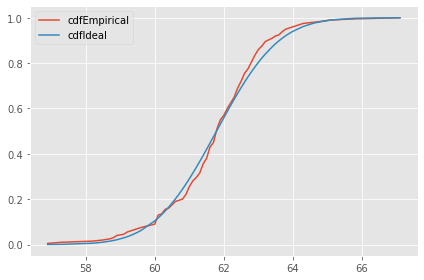

In [20]:
#{'loc': 61.78799999999999, 'scale': 1.4213922752006214}
ks_norm('depth', 0.95, 61.78799999999999,  1.4213922752006214)

## Price (gamma)

Ocurrences: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1])
Values: tensor([  394,   429,   447,   449,   470,   490,   504,   521,   526,   540,
          579,   605,   608,   625,   628,   630,   660,   665,   666,   673,
          675,   683,   690,   718,   720,   740,   760,   768,   773,   775,
          776,   794,   798,   802,   812,   854,   874,   878,   891,   895,
       

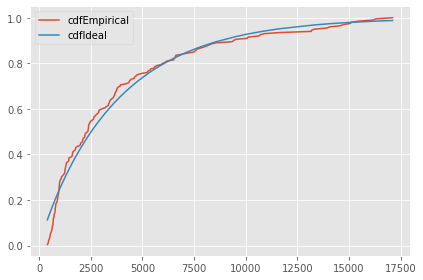

In [21]:
# => a = 0.9323533622969263
# => b = 4023.222473032064

def ks_gamma(col, conf=0.95, a=0, b=0):
    x = torch.tensor(df[col].values)
    histogramX, histogram = x.unique(return_counts=True)
    print('Ocurrences:', histogram)
    print('Values:', histogramX)

    #number of observations
    n = histogram.sum()
    histogramNorm = histogram / n        # Norm factor for mean
    histogramNorm2 = histogram / (n - 1) # Norm factor for std

    #calculate cumulative sum
    cdfEmpirical = torch.cumsum(histogramNorm, dim = 0)


    #Create ideal CDF
    gammaDensity = stats.gamma(a,scale=b)
    cdfGammaIdeal = gammaDensity.cdf(histogramX)
    cdfGammaIdeal = torch.from_numpy(cdfGammaIdeal)
    #gammaDensity = Gamma(a, b)
    #cdfGammaIdeal = gammaDensity.cdf(histogramX) #points used to evaluate cdf
    
    k_check(n, conf, cdfEmpirical, cdfGammaIdeal, histogramX)

    
ks_gamma('price', 0.95, 0.93, 4023.22)

## Z (chi2)

Ocurrences: tensor([1, 1, 1, 1, 1, 2, 1, 1, 5, 5, 1, 3, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 4,
        3, 5, 1, 3, 4, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 5, 2, 1, 3, 4, 2, 2, 1, 1,
        1, 1, 2, 1, 1, 2, 1, 2, 1, 3, 4, 1, 2, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2,
        1, 1, 1, 3, 2, 2, 2, 1, 1, 1, 1, 2, 4, 4, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1])
Values: tensor([2.4100, 2.5700, 2.5900, 2.6100, 2.6300, 2.6400, 2.6600, 2.6800, 2.6900,
        2.7000, 2.7100, 2.7200, 2.7300, 2.7400, 2.7500, 2.7600, 2.7700, 2.7800,
        2.7900, 2.8000, 2.8100, 2.8200, 2.8300, 2.8400, 2.8500, 2.8900, 2.9000,
        2.9500, 2.9700, 2.9800, 2.9900, 3.0300, 3.0600, 3.0700, 3.0900, 3.1100,
        3.1300, 3.1600, 3.1700, 3.1800, 3.1900, 3.2100, 3.2200, 3.2300, 3.2500,
        3.2600, 3.2700, 3.2800, 3.3100, 3.3800, 3.4000, 3.4200, 3.4500, 3.4800,
        3.5000, 3.5100, 3.5200, 3.5400, 3.5500, 3.5600, 3.5700, 3.5800, 3.5900,
     

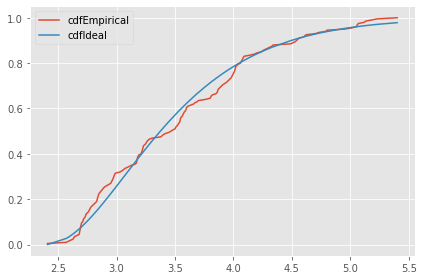

In [22]:
#{'df': 5.072547071771579, 'loc': 2.3668832019201735, 'scale': 0.22829065326560585}

def ks_chi2(col, conf=0.95, chidf=0, loc=0, scale=0):
    x = torch.tensor(df[col].values)
    histogramX, histogram = x.unique(return_counts=True)
    print('Ocurrences:', histogram)
    print('Values:', histogramX)

    #number of observations
    n = histogram.sum()
    histogramNorm = histogram / n        # Norm factor for mean
    histogramNorm2 = histogram / (n - 1) # Norm factor for std

    #calculate cumulative sum
    cdfEmpirical = torch.cumsum(histogramNorm, dim = 0)


    #Create ideal CDF
    chi2Density = stats.chi2(df=chidf, loc=loc, scale=scale)
    cdfIdeal = chi2Density.cdf(histogramX)
    cdfIdeal = torch.from_numpy(cdfIdeal)

    
    k_check(n, conf, cdfEmpirical, cdfIdeal, histogramX)

    
ks_chi2('z', 0.95, 5.07, 2.3668, 0.228)